## K_Nearest Neighbors(KNN)
-> one of simplest supervised machine learning 

- Can use in **classification** & **regression**
- Goal : find the closest K training examples

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

 ### Load & Explore data iris

In [38]:
df=pd.read_csv('Iris.csv')

# print first 5 rows of the dataset
display(df.head())

# print the shape of the dataset
df.shape

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


(150, 6)

In [39]:
df.info()

print("-----------------")

print(df['Species'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
-----------------
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


### Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`.
### Scatter plots should show each class in a different color.


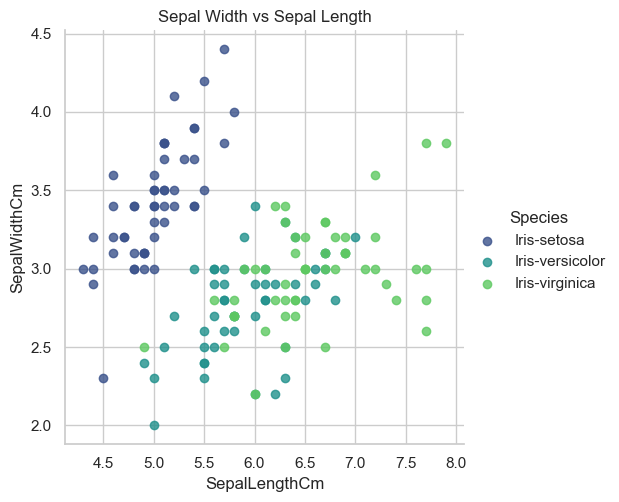

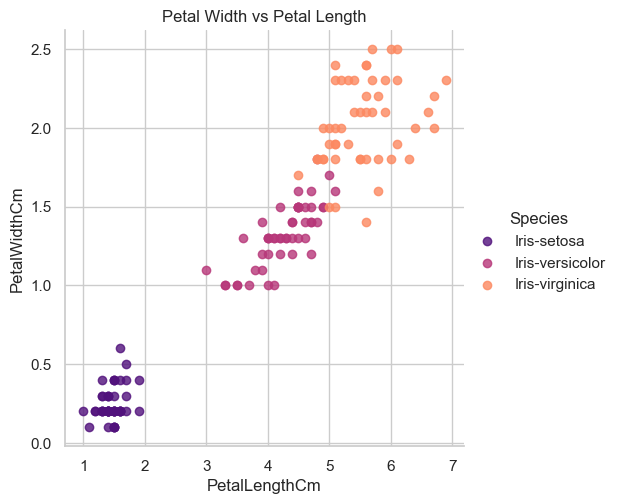

In [40]:
sns.set(style="whitegrid")


sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species',palette="viridis", fit_reg=False)
plt.title('Sepal Width vs Sepal Length')
plt.show()


sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species',palette="magma",fit_reg=False)
plt.title('Petal Width vs Petal Length')
plt.show()

### Prepare data for training

In [41]:
x = df.drop(['Id', 'Species'], axis=1) #axis=1 → removes columns.
y = df['Species']

display(x.head())
display(y.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

###  Split the data into training and testing sets

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


### Implement diff distance metrics

In [43]:
# Euclidean Distance (Shortest straight-line distance)
def euclidean_distance(x1, x2):
    return np.sum((x1-x2)**2)


# Manhattan Distance (Grid-based movement distance)
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1-x2))

# Cosine Similarity (Measures the angle between vectors)
def cosine_similarity(x1, x2):
    _dot=np.dot(x1,x2)
    _norm=np.linalg.norm(x1)*np.linalg.norm(x2)
    return _dot/_norm


### Implement KNN from scratch using the above distance metrics


In [44]:
class KNN:
    def __init__(self, k=3, distance_metric=euclidean_distance, task='classification'):
       self.k, self.distance_metric, self.task = k, distance_metric, task

    def fit(self, x, y):
        self.x_train,self.y_train= np.array(x),np.array(y) 

    def compute_distances(self, x):
        if self.distance_metric == euclidean_distance:
            return [euclidean_distance(x, X_train) for X_train in self.x_train]
        elif self.distance_metric == manhattan_distance:
            return [manhattan_distance(x, X_train) for X_train in self.x_train]
        elif self.distance_metric == cosine_similarity:
            return [1 - cosine_similarity(x, X_train) for X_train in self.x_train]
        else:
            raise ValueError("Invalid distance metric")

    def predict(self, x):
        x = np.array(x)  
        return np.array([self._predict(sample) for sample in x])

    def _predict(self, x):
        distances = self.compute_distances(x)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_outputs = [self.y_train[i] for i in k_indices]
        if self.task == 'classification':
            most_common = Counter(k_nearest_outputs).most_common(1)
            return most_common[0][0]
        elif self.task == 'regression':
            return np.mean(k_nearest_outputs)

### Train and evaluate


In [45]:
distance_metrics = {
    'Euclidean': euclidean_distance,
    'Manhattan': manhattan_distance,
    'Cosine': cosine_similarity
}

results = []

for name, metric in distance_metrics.items():
    model = KNN(k=3, distance_metric=metric, task='classification')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    correct_predictions= np.sum(y_pred == y_test)
    incorrect_predictions = len(y_test) - correct_predictions
    results.append([name, f"{accuracy:.2f}", f"{correct_predictions}/{len(y_test)}",incorrect_predictions])

# Create DataFrame and display
df = pd.DataFrame(results, columns=['K', 'Accuracy', 'Correct Predictions', 'Incorrect Predictions'])
display(df)


,K,Accuracy,Correct Predictions,Incorrect Predictions
0,Euclidean,1.00,45/45,0
1,Manhattan,1.00,45/45,0
2,Cosine,0.98,44/45,1


### Testing multiple values of K

In [46]:
K_values = [3, 4, 5, 6, 7, 10, 15, 30]
results = []

for k in K_values:
    model = KNN(k=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    correct_predictions = sum(y_test.values == y_pred)
    incorrect_predictions = len(y_test) - correct_predictions
    results.append([k, f"{accuracy:.2f}", f"{correct_predictions}/{len(y_test)}",incorrect_predictions])

# Create DataFrame and display
df = pd.DataFrame(results, columns=['K', 'Accuracy', 'Correct Predictions', 'Incorrect Predictions'])
display(df)

,K,Accuracy,Correct Predictions,Incorrect Predictions
0,3,100.00,45/45,0
1,4,100.00,45/45,0
2,5,100.00,45/45,0
3,6,100.00,45/45,0
4,7,100.00,45/45,0
5,10,100.00,45/45,0
6,15,100.00,45/45,0
7,30,100.00,45/45,0


### Compare between our Knn and sklearn Knn

In [47]:
from sklearn.neighbors import KNeighborsClassifier
import time

# Train & test custom KNN
start_time = time.time()
custom_knn = KNN(k=3)
custom_knn.fit(x_train, y_train)
y_pred_custom = custom_knn.predict(x_test)
custom_knn_time = time.time() - start_time
custom_knn_acc = accuracy_score(y_test, y_pred_custom)

# Train & test sklearn KNN
start_time = time.time()
sklearn_knn = KNeighborsClassifier(n_neighbors=3)
sklearn_knn.fit(x_train, y_train)
y_pred_sklearn = sklearn_knn.predict(x_test)
sklearn_knn_time = time.time() - start_time
sklearn_knn_acc = accuracy_score(y_test, y_pred_sklearn)

# Create DataFrame for results
results = [
    ["Custom KNN", f"{custom_knn_acc:.2f}", f"{custom_knn_time:.4f} sec"],
    ["Sklearn KNN", f"{sklearn_knn_acc:.2f}", f"{sklearn_knn_time:.4f} sec"]
]

df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Time'])
display(df)

,Model,Accuracy,Time
0,Custom KNN,1.00,0.0243 sec
1,Sklearn KNN,1.00,0.0055 sec
